[Text(0, 0, 'Amazon Prime'),
 Text(0, 0, 'Amazon'),
 Text(0, 0, 'iTunes'),
 Text(0, 0, 'Netflix'),
 Text(0, 0, 'Vudu')]

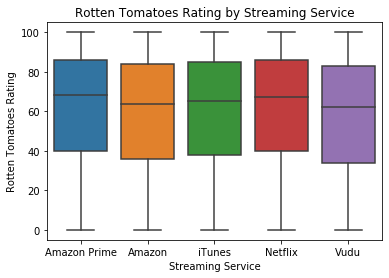

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read csv files into pandas dataframes
amazon_prime = pd.read_csv("./scores/amazon_prime.csv", header=None, names=["amazon_prime"])
amazon = pd.read_csv("./scores/amazon.csv", header=None, names=["amazon"])
itunes = pd.read_csv("./scores/itunes.csv", header=None, names=["itunes"])
netflix = pd.read_csv("./scores/netflix_iw.csv", header=None, names=["netflix"])
vudu = pd.read_csv("./scores/vudu.csv", header=None, names=["vudu"])

# Make boxplot of ratings by streaming service
ax = sns.boxplot(data=[amazon_prime, amazon, itunes, netflix, vudu])
ax.set(title="Rotten Tomatoes Rating by Streaming Service", xlabel='Streaming Service', ylabel='Rotten Tomatoes Rating')
ax.set_xticklabels(["Amazon Prime", "Amazon", "iTunes", "Netflix", "Vudu"])

In [3]:
all_scores = pd.read_csv("./scores/all_scores.csv")
all_scores.head()

,title,tomato_score,audience_score,release_date,runtime,rating,genre,cast,studio,director
0,Many Adventures of Winnie the Pooh (1977),100,88,1977-03-10 16:00:00-08:00,74,G,"['Animation', 'Comedy', 'Kids & Family', 'Musi...","['Sterling Holloway', 'Paul Winchell', 'Junius...",Walt Disney Productions,"['Wolfgang Reitherman', 'John Lounsbery']"
1,Toy Story 2 (1999),100,86,1999-11-23 16:00:00-08:00,92,G,"['Animation', 'Comedy', 'Kids & Family']","['Tim Allen', 'Joan Cusack', 'Kelsey Grammer',...",Buena Vista Pictures,['John Lasseter']
2,The Odd Couple (1968),100,89,1967-12-31 16:00:00-08:00,105,PG,"['Classics', 'Comedy', 'Drama']","['Walter Matthau', 'Jack Lemmon', 'Monica Evan...",Paramount Home Video,['Gene Saks']
3,Old Yeller (1957),100,79,1957-12-24 16:00:00-08:00,84,G,"['Action & Adventure', 'Classics', 'Drama', 'K...","['Dorothy McGuire', 'Tommy Kirk', 'Kevin Corco...",Buena Vista Pictures,['Robert Stevenson']
4,On a Clear Day You Can See Forever (1970),100,75,1969-12-31 16:00:00-08:00,129,G,"['Classics', 'Comedy', 'Drama', 'Musical & Per...","['Barbra Streisand', 'Yves Montand', 'Bob Newh...",Paramount Pictures,['Vincente Minnelli']


In [13]:
all_scores[['tomato_score', 'audience_score']].plot.scatter()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'